# Classification

| **Hyperparameter**          | **Binary Classification**                                                                                  | **Multiclass Classification**                                                                       |
|------------------------------|-----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| **Input layer shape**        | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification                                                                     |
| **Hidden layer(s)**          | Problem specific, minimum = 1, maximum = unlimited                                                       | Same as binary classification                                                                     |
| **Neurons per hidden layer** | Problem specific, generally 10 to 100                                                                    | Same as binary classification                                                                     |
| **Output layer shape**       | 1 (one class or the other)                                                                               | 1 per class (e.g. 3 for food, person, or dog photo)                                               |
| **Hidden activation**        | Usually ReLU (rectified linear unit)                                                                     | Same as binary classification                                                                     |
| **Output activation**        | Sigmoid                                                                                                  | Softmax                                                                                           |
| **Loss function**            | Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow)                                       | Cross entropy (`tf.keras.losses.CategoricalCrossentropy` in TensorFlow)                           |
| **Optimizer**                | SGD (stochastic gradient descent), Adam                                                                 | Same as binary classification                                                                     |

In [2]:
import pandas as pd
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


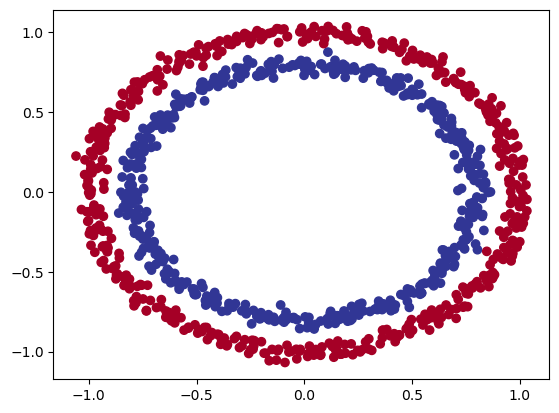

In [3]:

# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [4]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
     1. CS231n - https://cs231n.github.io/neural-networks-case-study/
     2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [5]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


2024-11-29 11:25:00.028925: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 460us/step - loss: 0.7519 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 411us/step - loss: 0.7485 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 395us/step - loss: 0.7452 - accuracy: 0.5030
Epoch 4/5
32/32 [==============================] - 0s 317us/step - loss: 0.7422 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 354us/step - loss: 0.7393 - accuracy: 0.5010


313/313 [==============================] - 0s 219us/step
doing binary classifcation...


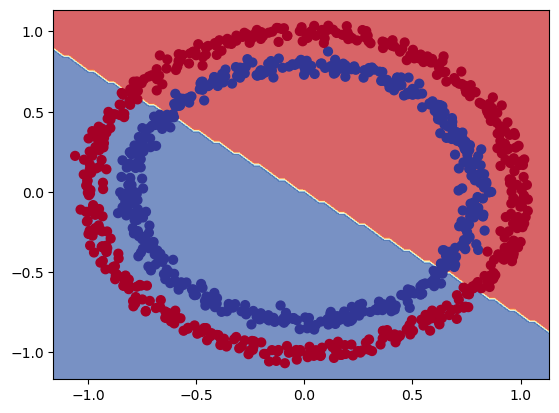

In [7]:
plot_decision_boundary(model_1,X,y)

In [8]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh), 
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy, # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 0s 522us/step - loss: 0.6977 - accuracy: 0.5040
Epoch 2/150
32/32 [==============================] - 0s 445us/step - loss: 0.6939 - accuracy: 0.5230
Epoch 3/150
32/32 [==============================] - 0s 411us/step - loss: 0.6926 - accuracy: 0.5540
Epoch 4/150
32/32 [==============================] - 0s 380us/step - loss: 0.6928 - accuracy: 0.4960
Epoch 5/150
32/32 [==============================] - 0s 385us/step - loss: 0.6922 - accuracy: 0.5170
Epoch 6/150
32/32 [==============================] - 0s 372us/step - loss: 0.6919 - accuracy: 0.5550
Epoch 7/150
32/32 [==============================] - 0s 406us/step - loss: 0.6912 - accuracy: 0.5520
Epoch 8/150
32/32 [==============================] - 0s 350us/step - loss: 0.6913 - accuracy: 0.5600
Epoch 9/150
32/32 [==============================] - 0s 357us/step - loss: 0.6905 - accuracy: 0.5810
Epoch 10/150
32/32 [==============================] - 0s 365us/step - loss: 0.6904 - accura

313/313 [==============================] - 0s 228us/step
doing binary classifcation...


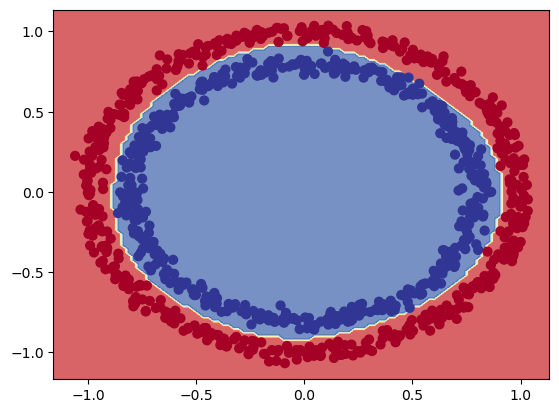

In [9]:
plot_decision_boundary(model_2,X,y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history = model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 454us/step - loss: 0.6994 - accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 386us/step - loss: 0.6957 - accuracy: 0.5088
Epoch 3/100
25/25 [==============================] - 0s 419us/step - loss: 0.6931 - accuracy: 0.5213
Epoch 4/100
25/25 [==============================] - 0s 477us/step - loss: 0.6933 - accuracy: 0.5088
Epoch 5/100
25/25 [==============================] - 0s 359us/step - loss: 0.6921 - accuracy: 0.5288
Epoch 6/100
25/25 [==============================] - 0s 344us/step - loss: 0.6921 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 386us/step - loss: 0.6916 - accuracy: 0.5263
Epoch 8/100
25/25 [==============================] - 0s 344us/step - loss: 0.6913 - accuracy: 0.5250
Epoch 9/100
25/25 [==============================] - 0s 384us/step - loss: 0.6914 - accuracy: 0.5238
Epoch 10/100
25/25 [==============================] - 0s 344us/step - loss: 0.6912 - accura

In [12]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 511us/step - loss: 0.6118 - accuracy: 0.8300


[0.6118320226669312, 0.8299999833106995]

313/313 [==============================] - 0s 229us/step
doing binary classifcation...


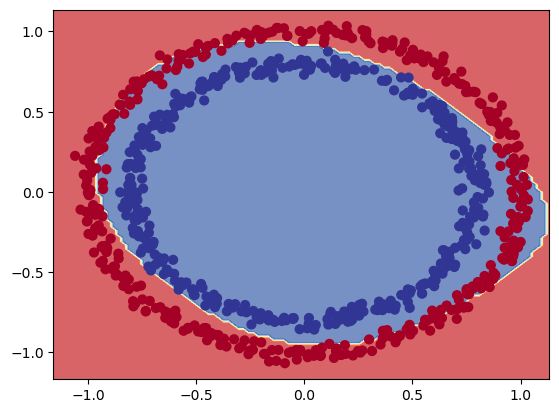

In [13]:
plot_decision_boundary(model_4, X_train, y_train)

313/313 [==============================] - 0s 291us/step
doing binary classifcation...


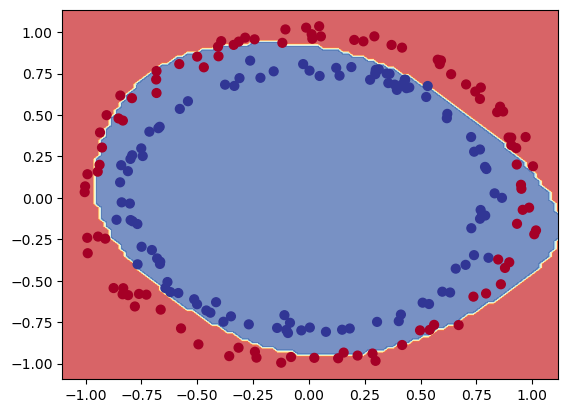

In [14]:
plot_decision_boundary(model_4, X_test, y_test)

<Axes: >

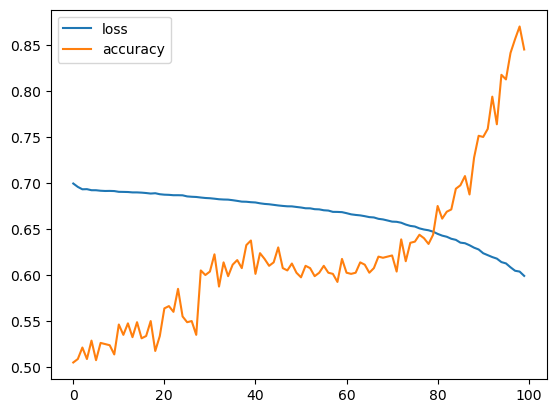

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot()

## Finding the best learning rate

In [20]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_5.fit(X_train, y_train,epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 512us/step - loss: 0.7427 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 440us/step - loss: 0.7409 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 405us/step - loss: 0.7391 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 409us/step - loss: 0.7372 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 365us/step - loss: 0.7353 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 347us/step - loss: 0.7330 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 363us/step - loss: 0.7309 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 332us/step - loss: 0.7286 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='epochs'>

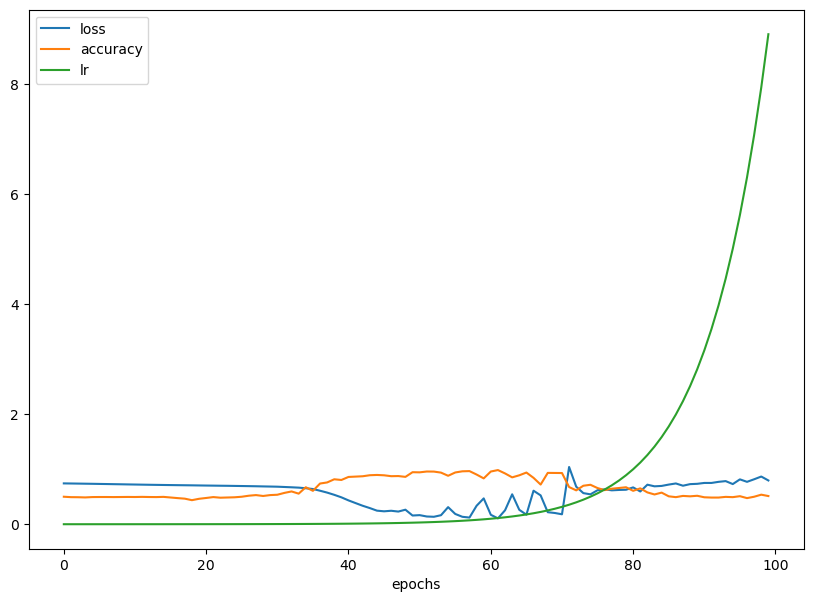

In [21]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

## Plot the learning rate vs the loss

Plotam learning rate vs loss pentru a gasi cel mai bun learning rate

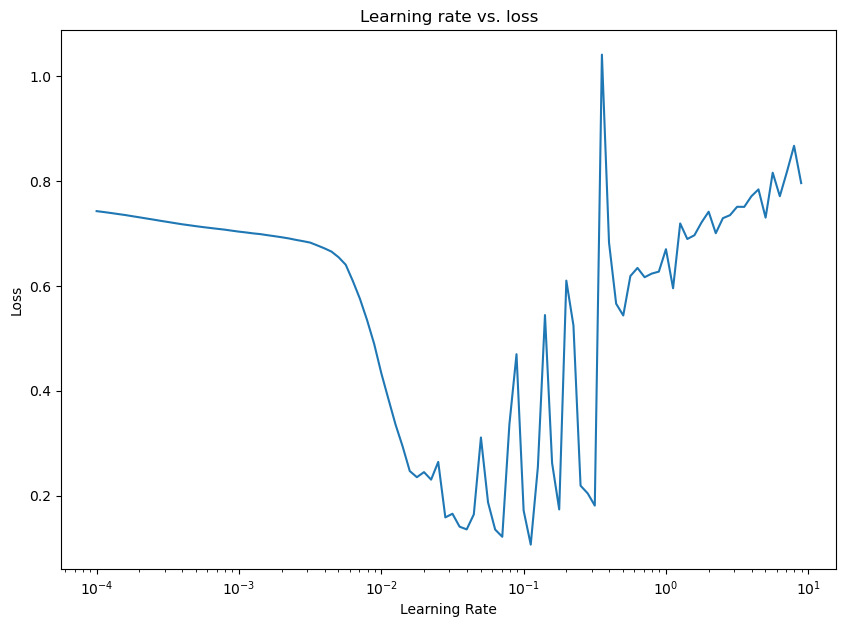

In [23]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

# Evaluation Metrics

| Metric Name/Evaluation Method | Definition                                                                                                                                                                                                                                     | Code                                     |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------|
| Accuracy                       | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.                                                                                                                      | `sklearn.metrics.accuracy_score()` or `tf.keras.metrics.Accuracy()` |
| Precision                      | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).                                                                                        | `sklearn.metrics.precision_score()` or `tf.keras.metrics.Precision()` |
| Recall                         | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.                                                                | `sklearn.metrics.recall_score()` or `tf.keras.metrics.Recall()` |
| F1-score                       | Combines precision and recall into one metric. 1 is best, 0 is worst.                                                                                                                                                                         | `sklearn.metrics.f1_score()` |
| Confusion matrix               | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).                                                                               | Custom function or `sklearn.metrics.plot_confusion_matrix()` |
| Classification report          | Collection of some of the main classification metrics such as precision, recall and f1-score.                                                                                                                                                 | `sklearn.metrics.classification_report()` |

In [27]:
# get the accuracy
loss, accuracy = model_4.evaluate(X_test,y_test)
loss, accuracy

7/7 [==============================] - 0s 550us/step - loss: 0.6118 - accuracy: 0.8300


(0.6118320226669312, 0.8299999833106995)

In [39]:
y_pred = model_4.predict(X_test)
y_pred[:10]

7/7 [==============================] - 0s 462us/step


array([[0.61331016],
       [0.47905597],
       [0.5823649 ],
       [0.4837952 ],
       [0.56337583],
       [0.5736822 ],
       [0.4321547 ],
       [0.49048087],
       [0.5612552 ],
       [0.46911967]], dtype=float32)

### Confussion Matrix

Prima data trebuie sa transformam predictiile in 0 sau 1 deoarece dupa cum se vede mai sus in momentul asta au valori intre 0 si 1

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tf.round(y_pred))



array([[67, 33],
       [ 1, 99]])

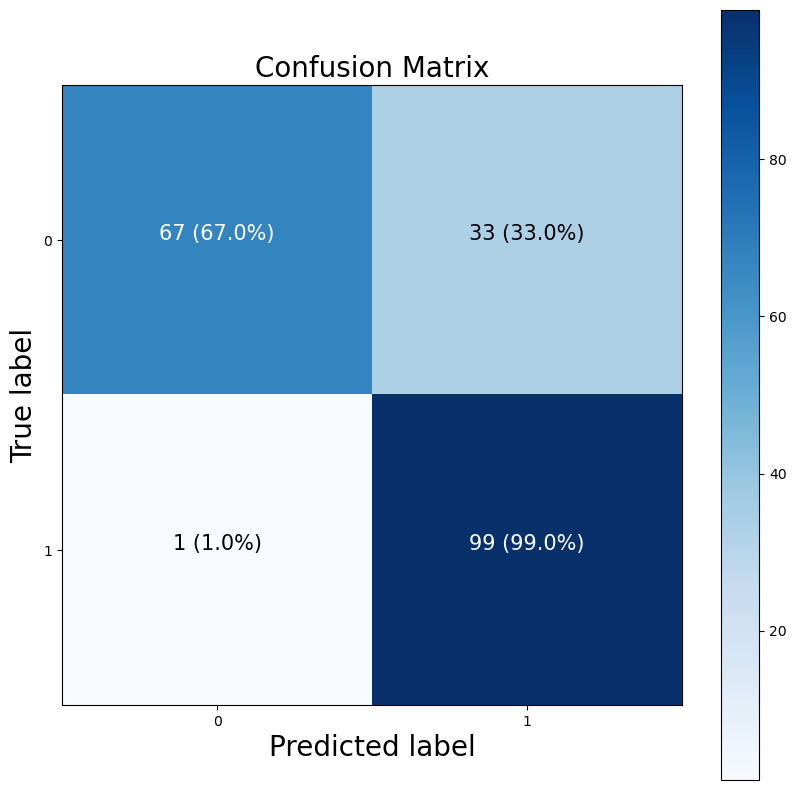

In [41]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

Se interpreteaza asa:
A prezis 0 si a fost TP in 67% din cazuri.
A prezis 1 si a fost TP in 99%.
A prezis 0 si a fost 1 in 1% din cazuri.
A prezis 1 si a fost 0 in 33% din cazuri

# Working on a larger example

In [70]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [71]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

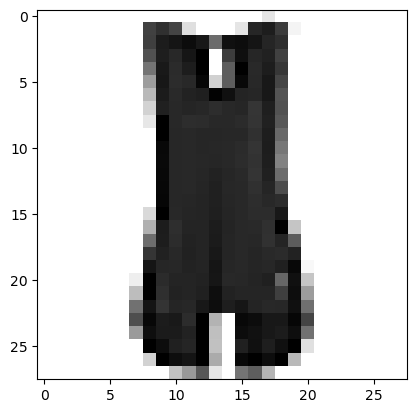

In [72]:
import matplotlib.pyplot as plt

plt.imshow(train_data[4], cmap=plt.cm.binary)

In [73]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

In [74]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 436us/step - loss: 1.9597 - accuracy: 0.2173 - val_loss: 1.6804 - val_accuracy: 0.3081
Epoch 2/10
1875/1875 [==============================] - 1s 412us/step - loss: 1.6005 - accuracy: 0.3046 - val_loss: 1.5586 - val_accuracy: 0.3057
Epoch 3/10
1875/1875 [==============================] - 1s 410us/step - loss: 1.5119 - accuracy: 0.3329 - val_loss: 1.4849 - val_accuracy: 0.3470
Epoch 4/10
1875/1875 [==============================] - 1s 405us/step - loss: 1.4511 - accuracy: 0.3742 - val_loss: 1.4159 - val_accuracy: 0.3808
Epoch 5/10
1875/1875 [==============================] - 1s 412us/step - loss: 1.3953 - accuracy: 0.3957 - val_loss: 1.3897 - val_accuracy: 0.3831
Epoch 6/10
1875/1875 [==============================] - 1s 408us/step - loss: 1.3685 - accuracy: 0.4025 - val_loss: 1.3860 - val_accuracy: 0.3825
Epoch 7/10
1875/1875 [==============================] - 1s 423us/step - loss: 1.3486 - accuracy: 0.4082 - val_loss: 1.3755 -

In [75]:
model_l1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Se poate observa ca nu are parametrii layerul de flattern

In [76]:
train_data.min(), train_data.max()

(0, 255)

In [77]:
#normalize the values
train_data = train_data/255.0
test_data = test_data/255.0

train_data.min(),test_data.max()

(0.0, 1.0)

In [78]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 390us/step - loss: 1.1970 - accuracy: 0.5739 - val_loss: 0.8669 - val_accuracy: 0.6771
Epoch 2/10
1875/1875 [==============================] - 1s 356us/step - loss: 0.7701 - accuracy: 0.6974 - val_loss: 0.7251 - val_accuracy: 0.7073
Epoch 3/10
1875/1875 [==============================] - 1s 355us/step - loss: 0.6747 - accuracy: 0.7257 - val_loss: 0.6677 - val_accuracy: 0.7285
Epoch 4/10
1875/1875 [==============================] - 1s 353us/step - loss: 0.6385 - accuracy: 0.7356 - val_loss: 0.6546 - val_accuracy: 0.7263
Epoch 5/10
1875/1875 [==============================] - 1s 358us/step - loss: 0.6211 - accuracy: 0.7437 - val_loss: 0.6366 - val_accuracy: 0.7397
Epoch 6/10
1875/1875 [==============================] - 1s 357us/step - loss: 0.6075 - accuracy: 0.7510 - val_loss: 0.6362 - val_accuracy: 0.7386
Epoch 7/10
1875/1875 [==============================] - 1s 371us/step - loss: 0.5988 - accuracy: 0.7548 - val_loss: 0.6305 -

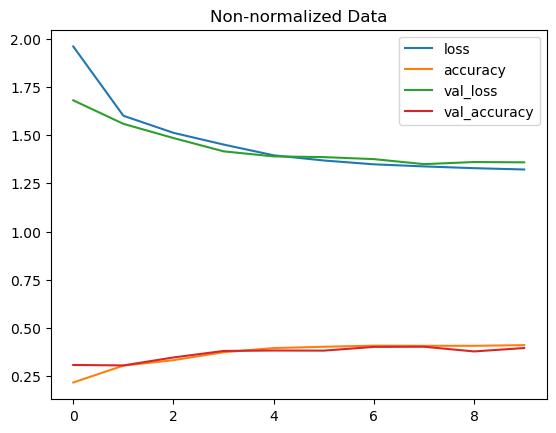

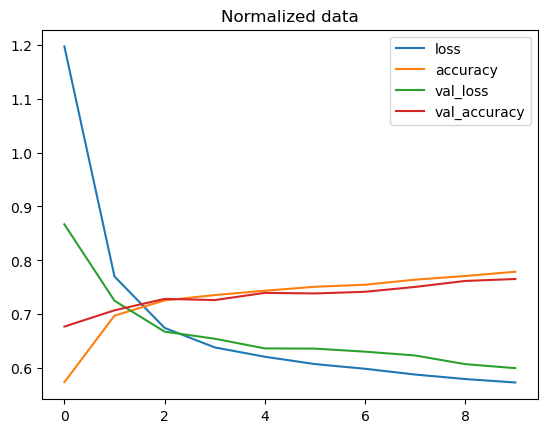

In [79]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [80]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  
    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.
  
    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).
  
    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.
  
    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes), # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels, # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [94]:
# Make predictions with the most recent model
y_probs = model_12.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]


313/313 [==============================] - 0s 247us/step


array([[1.18476878e-14, 6.97353869e-07, 6.70598022e-10, 4.00914013e-09,
        2.21635946e-06, 2.28659779e-01, 9.89271165e-12, 6.17160387e-02,
        9.35744320e-05, 7.09527671e-01],
       [8.10984988e-03, 2.01571660e-04, 4.67577308e-01, 2.66295834e-03,
        3.24833453e-01, 2.96144537e-03, 1.83494031e-01, 9.98204690e-04,
        8.76094215e-03, 4.00311896e-04],
       [1.20866588e-08, 9.98524249e-01, 4.71665773e-09, 5.15956955e-04,
        5.22096416e-05, 8.66018469e-04, 3.02448711e-09, 2.75030525e-05,
        2.84906942e-08, 1.40214197e-05],
       [1.83188409e-09, 9.99247849e-01, 5.72898562e-10, 2.26753444e-04,
        1.43996758e-05, 4.92273306e-04, 3.51835422e-10, 1.22667234e-05,
        5.51294077e-09, 6.29569786e-06],
       [1.17988095e-01, 4.98874215e-05, 2.34013304e-01, 1.84156131e-02,
        5.83492182e-02, 1.52502198e-05, 5.57622492e-01, 4.46183258e-04,
        1.30958240e-02, 4.09381391e-06]], dtype=float32)

In [95]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:50]


array([9, 2, 1, 1, 6, 1, 2, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5,
       7, 7, 1, 2, 2, 3, 9, 3, 8, 8, 3, 3, 8, 6, 7, 5, 7, 9, 0, 1, 3, 7,
       2, 5, 2, 1, 4, 2])

In [96]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[741,   0,  14,  76,  17,   0, 141,   0,  11,   0],
       [  1, 947,   4,  32,  15,   0,   1,   0,   0,   0],
       [ 13,   1, 696,  12, 167,   0, 107,   0,   4,   0],
       [ 47,  12,   4, 814,  51,   0,  67,   0,   5,   0],
       [  0,   4, 462,  36, 439,   0,  52,   0,   7,   0],
       [  0,   0,   1,   1,   4, 925,   0,  39,   2,  28],
       [196,   2, 317,  48,  66,   0, 358,   0,  13,   0],
       [  0,   0,   0,   0,   0,  69,   0, 881,   0,  50],
       [  8,   0,  17,   9,   6,   5,  18,   3, 928,   6],
       [  0,   0,   0,   0,   0,  29,   0,  40,   6, 925]])

In [97]:
test_labels.shape, y_pred.shape

((10000,), (200, 1))

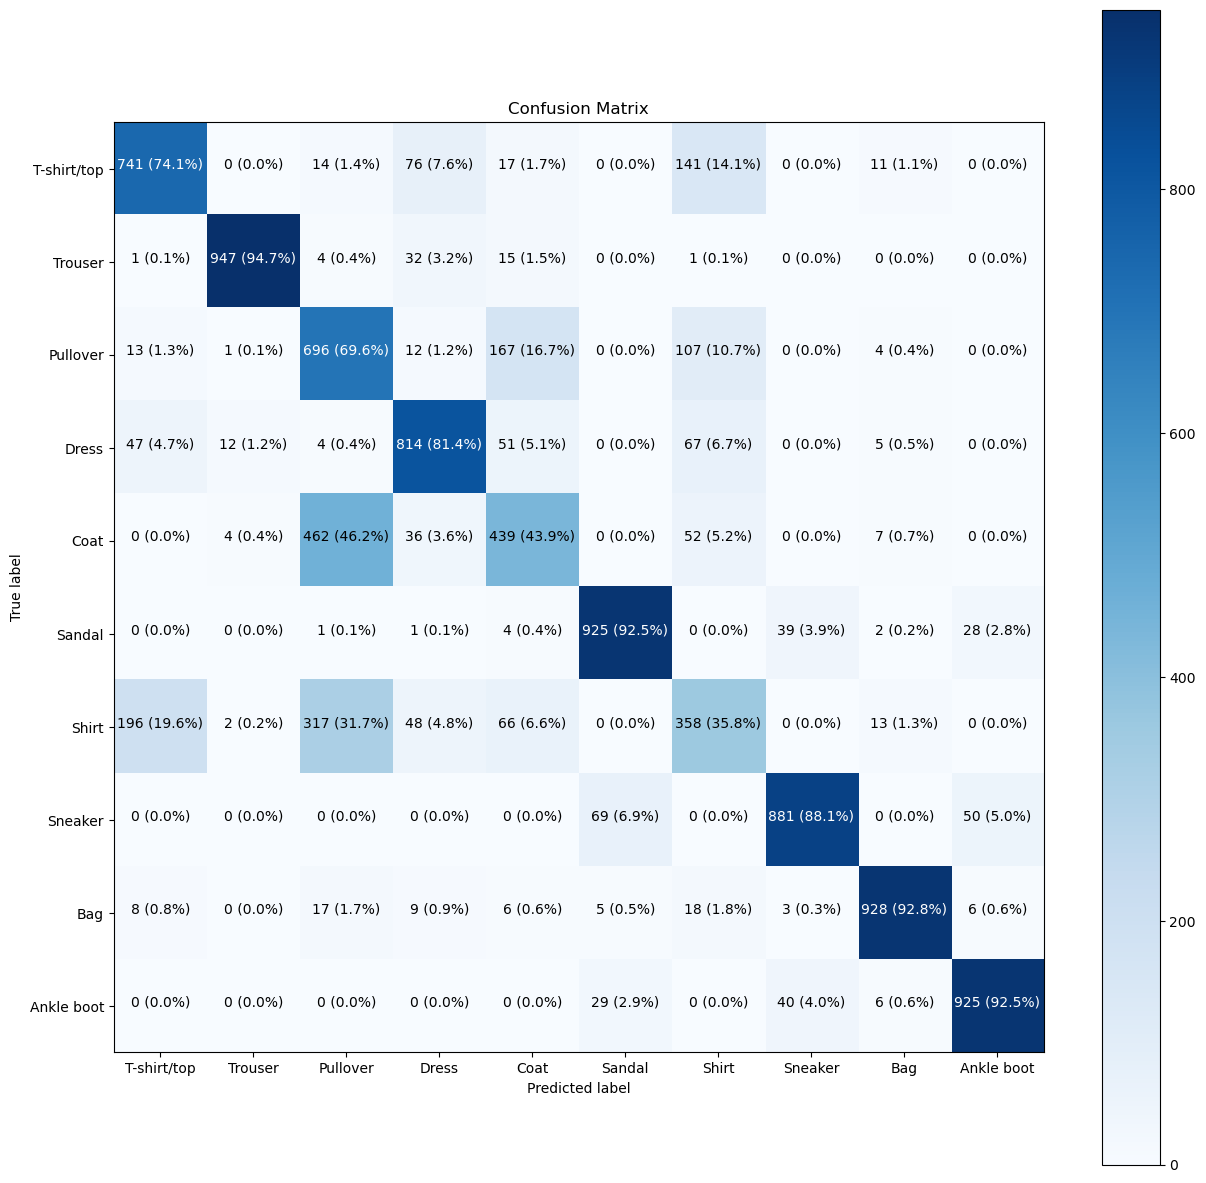

In [98]:

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [100]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_12, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
